In [1]:
import pandas as pd

In [2]:
data_train = pd.read_csv("tripadvisor_train.csv")

In [3]:
data_train.head()
data_train.tail()
data_train.info()
data_train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12295 entries, 0 to 12294
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Review       12295 non-null  object
 1   Rating       12295 non-null  int64 
 2   Rating_name  12295 non-null  object
dtypes: int64(1), object(2)
memory usage: 288.3+ KB


,Rating
count,12295.000000
mean,2.947377
std,1.237298
min,0.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,4.000000


In [4]:
data_val = pd.read_csv("tripadvisor_val.csv")

In [5]:
data_val.head()
data_val.tail()
data_val.info()
data_val.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4099 entries, 0 to 4098
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Review       4099 non-null   object
 1   Rating       4099 non-null   int64 
 2   Rating_name  4099 non-null   object
dtypes: int64(1), object(2)
memory usage: 96.2+ KB


,Rating
count,4099.000000
mean,2.942913
std,1.231267
min,0.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,4.000000


In [6]:
data_test = pd.read_csv("tripadvisor_test.csv")

In [7]:
data_test.head()
data_test.tail()
data_test.info()
data_test.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4099 entries, 0 to 4098
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Review       4099 non-null   object
 1   Rating       4099 non-null   int64 
 2   Rating_name  4099 non-null   object
dtypes: int64(1), object(2)
memory usage: 96.2+ KB


,Rating
count,4099.000000
mean,2.976336
std,1.221723
min,0.000000
25%,3.000000
50%,3.000000
75%,4.000000
max,4.000000


In [8]:
import numpy as np
from tokenizers import BertWordPieceTokenizer

tokenizer = BertWordPieceTokenizer("bert-base-uncased-vocab.txt", lowercase=True)
# tokenizer = BertWordPieceTokenizer.from_file("bert-base-uncased-vocab.txt", lowercase=True)
# tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

def bert_tokenizer(data):
    result = []
    for item in data:
        result.append(tokenizer.encode(item).ids)
    #

    return np.array(result)

In [9]:
import tensorflow as tf

maxlen = 128

X_train = list(data_train["Review"].values)
X_train = bert_tokenizer(X_train)
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, maxlen=maxlen)
y_train = data_train["Rating"].values

X_val = list(data_val["Review"].values)
X_val = bert_tokenizer(X_val)
y_val = data_val["Rating"].values
X_val = tf.keras.preprocessing.sequence.pad_sequences(X_val, maxlen=maxlen)

X_test = list(data_test["Review"].values)
X_test = bert_tokenizer(X_test)
y_test = data_test["Rating"].values
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, maxlen=maxlen)

<ipython-input-8-1deaab8dfecd>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(result)


In [10]:
X_train[0]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,   101,  2190,
        3309,  3095,  3309, 18783,  1010, 12138,  3824,  2806,  1010,
        4734,  2235,  2715,  2640,  5186,  6625,  1010,  3295,  2307,
        3733,  2350,  4573,  9941,  3329,  3902,  3345,  1010,  3095,
        3942, 11813,  1010,  5379,  4699,  3679,  2746,  2015,  2183,
        2015,  7078, 12774,  2191,  3325,  3000,  2569,  1010, 29590,
        2972,  3095,  2814,  2185,  2188,  1010,  2994,  4440,  3000,
        1010,   102]

In [11]:
import tensorflow as tf

emb_size = 32
max_features = 30523

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_features, emb_size, input_length=maxlen),
    tf.keras.layers.Conv1D(32, 7, activation='relu'),
    tf.keras.layers.MaxPooling1D(5),
    tf.keras.layers.Conv1D(32, 7, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(units=5, activation='softmax')
]) 

model.compile(optimizer='adam',
                  loss="sparse_categorical_crossentropy",
                  metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 128, 32)           976736    
_________________________________________________________________
conv1d (Conv1D)              (None, 122, 32)           7200      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 24, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 18, 32)            7200      
_________________________________________________________________
global_max_pooling1d (Global (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 5)                 165       
Total params: 991,301
Trainable params: 991,301
Non-trainable params: 0
__________________________________________________

In [12]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)

h = model.fit(X_train, 
            y_train,
            epochs=5,
            verbose=1,
            batch_size=8,
            callbacks=[callback],
            validation_data=(X_val, y_val))

Epoch 1/5
1537/1537 [==============================] - 38s 24ms/step - loss: 1.2467 - accuracy: 0.4663 - val_loss: 0.9451 - val_accuracy: 0.5758
Epoch 2/5
1537/1537 [==============================] - 40s 26ms/step - loss: 0.7716 - accuracy: 0.6685 - val_loss: 0.9468 - val_accuracy: 0.5706
Epoch 3/5
1537/1537 [==============================] - 34s 22ms/step - loss: 0.5236 - accuracy: 0.7942 - val_loss: 1.1466 - val_accuracy: 0.5743


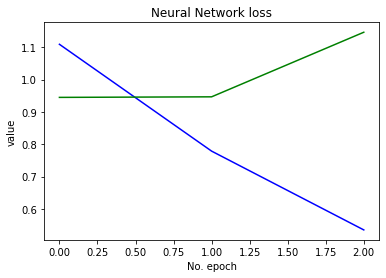

In [13]:
import matplotlib.pyplot as plt

plt.plot(h.history['loss'], label='(training data)',color='blue')
plt.plot(h.history['val_loss'], label='(val data)',color='green')
plt.title('Neural Network loss')
plt.ylabel('value')
plt.xlabel('No. epoch')
plt.show()

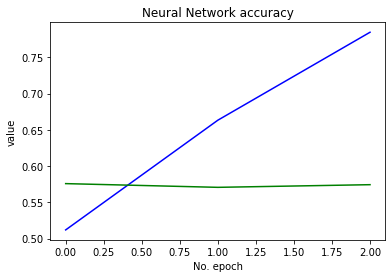

In [14]:
import matplotlib.pyplot as plt

plt.plot(h.history['accuracy'], label='(training data)',color='blue')
plt.plot(h.history['val_accuracy'], label='(val data)',color='green')
plt.title('Neural Network accuracy')
plt.ylabel('value')
plt.xlabel('No. epoch')
plt.show()

In [15]:
results = model.evaluate(X_test, y_test, batch_size=32)
print("test loss, test acc:", results)

129/129 [==============================] - 1s 4ms/step - loss: 1.1682 - accuracy: 0.5692
test loss, test acc: [1.1681785583496094, 0.5691632032394409]


In [16]:
data_test_fresh = pd.read_csv("tripadvisor_test.csv")

In [17]:
preds = np.round(model.predict(X_test[:100]))
for i in range(len(preds)):
    print(data_test_fresh['Review'].values[i][:100], '...')
    print("Pred: ", preds[i], "Real: ", y_test[i])

great value family friendly resort just returned visit punta cana, traveled families 21 people total ...
Pred:  [0. 0. 0. 0. 1.] Real:  3
ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle, start b ...
Pred:  [0. 0. 0. 0. 0.] Real:  1
quiet relaxing hotel stayed double room hotel floor, room kept clean tidy folding pyjamas, shower fa ...
Pred:  [0. 0. 0. 0. 1.] Real:  3
good hotel despite building work no problems hotel good size clean rooms, good range english tv incl ...
Pred:  [0. 0. 0. 1. 0.] Real:  3
best vac, melia 5th feb 12th, niece there3 weeks issues experienced none, 6th trip dominican facilit ...
Pred:  [0. 0. 0. 0. 1.] Real:  4
mi favorito, el convento simply great, night honeymoon updgraded nicest suite hotel, bathroom ceilin ...
Pred:  [0. 0. 0. 0. 1.] Real:  4
perfect london hotel, wow, husband went london stayed draycott night moved possible, hotel just perf ...
Pred:  [0. 0. 0. 0. 1.] Real:  4
good stay vincci soho recently ret